In [1]:
from read_jsons import *

# Define the station name
station_name = 'oakisland_west'
# station_name = 'jennette_north'
# station_name = 'currituck_hampton_inn'

# Instantiate the ShorelineDataProcessor class
processor = ShorelineDataProcessor(station_name)


In [2]:

# Load the station configuration data into a DataFrame
station_info_df = processor.get_station_info()
station_info_df.head()
# print(f"Dune Orientation: {station_info_df['Dune Line Info'][0]['Duneline Orientation']}")


,Station Name,RTSP URL,Station Name String,Orientation,Dune Line Info,Apx. Shoreline,Horizon Line Endpoints,Shoreline Transects
0,oakisland_west,https://stage-ams.srv.axds.co/archive/mp4/uncw...,['oakisland_west'],2,"{'Duneline Orientation': 'Ocean Left', 'Dune L...","{'station': 'oakisland_west', 'slX': [0.0, 400...","[[0.0, 0.0], [0.0, 0.0]]","{'x': [[465, 200], [465, 0.0], [465, 0.0], [46..."


In [3]:
# Extract and convert the transect data to NumPy arrays
transects = processor.get_station_transects()
# transects.sort_values('Transects Y').T
transects.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Transects X,465.0,200.0,465.0,0.0,465.0,0.0,465.0,0.0,465.0,0.0,...,465.0,0.0,465.0,0.0,465.0,0.0,465.0,0.0,465.0,0.0
Transects Y,163.0,163.0,166.0,166.0,169.0,169.0,172.0,172.0,175.0,175.0,...,220.0,220.0,223.0,223.0,226.0,226.0,229.0,229.0,232.0,232.0


In [4]:
# Extract and store the orientation value
orientation = processor.get_station_orientation()

# View the orientation value
print(f"Orientation: {orientation}")

Orientation: 2


In [5]:
# Load the JSON files from the specified data directory into a DataFrame
json_df = processor.get_shoreline_jsons()
json_df.head(2)


,Station Name,Date,Time Info,Thresh,Otsu Threshold,Shoreline Transects,Threshold Weightings,Shoreline Points,Filename
0,oakisland_west,2022-11-01,2022-11-01 11:31:17,-0.006300,-0.023851,"{'x': [[465.0, 200.0], [465.0, 0.0], [465.0, 0...","[0.3333333333333333, 0.6666666666666666]","[[326.0, 163.0], [322.0, 166.0], [322.0, 169.0...",oakisland_west-2022-11-01_1131.avg.slVars.json
1,oakisland_west,2022-11-01,2022-11-01 12:31:15,0.170119,0.117915,"{'x': [[465.0, 200.0], [465.0, 0.0], [465.0, 0...","[0.3333333333333333, 0.6666666666666666]","[[391.0, 163.0], [374.0, 166.0], [350.0, 169.0...",oakisland_west-2022-11-01_1231.avg.slVars.json


In [6]:
otsu_threshold = json_df.iloc[:,[2,4]]
otsu_threshold.set_index('Time Info', inplace=True)
otsu_threshold.describe()


,Otsu Threshold
count,9131.000000
mean,0.029620
std,0.072857
min,-0.231840
25%,-0.015606
50%,0.043038
75%,0.078236
max,0.489476


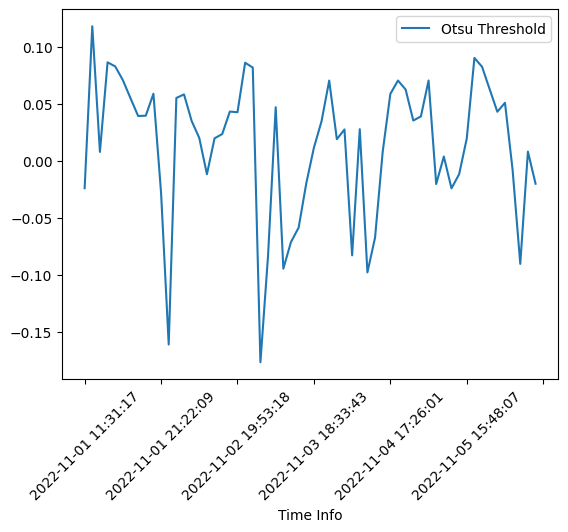

In [7]:
otsu_threshold.iloc[:60].plot().xaxis.set_tick_params(rotation=45)

In [8]:
# Get the shoreline coordinates DataFrame
shoreline_coords_df = processor.get_shoreline_coords()
shoreline_coords_df.iloc[:5,:]

Y,163.0,166.0,169.0,172.0,175.0,178.0,181.0,184.0,187.0,190.0,...,205.0,208.0,211.0,214.0,217.0,220.0,223.0,226.0,229.0,232.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-01 11:31:17,326.0,322.0,322.0,303.0,292.0,274.0,259.0,245.0,235.0,221.0,...,163.0,149.0,134.0,125.0,111.0,101.0,87.0,80.0,72.0,62.0
2022-11-01 12:31:15,391.0,374.0,350.0,311.0,288.0,271.0,256.0,239.0,216.0,197.0,...,153.0,143.0,129.0,120.0,110.0,101.0,87.0,80.0,72.0,63.0
2022-11-01 13:32:11,445.0,411.0,397.0,374.0,333.0,312.0,292.0,273.0,259.0,245.0,...,172.0,154.0,143.0,130.0,118.0,106.0,91.0,79.0,68.0,57.0
2022-11-01 14:21:17,407.0,405.0,382.0,350.0,326.0,311.0,295.0,274.0,260.0,249.0,...,178.0,163.0,153.0,139.0,125.0,115.0,102.0,91.0,81.0,67.0
2022-11-01 15:22:06,417.0,410.0,384.0,357.0,331.0,322.0,307.0,283.0,273.0,259.0,...,187.0,172.0,162.0,149.0,136.0,125.0,112.0,101.0,93.0,80.0


In [9]:
shoreline_coords_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9131 entries, 2022-11-01 11:31:17 to 2024-09-19 22:58:38
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   163.0   8522 non-null   float64
 1   166.0   8837 non-null   float64
 2   169.0   9019 non-null   float64
 3   172.0   9057 non-null   float64
 4   175.0   9097 non-null   float64
 5   178.0   9110 non-null   float64
 6   181.0   9118 non-null   float64
 7   184.0   9118 non-null   float64
 8   187.0   9124 non-null   float64
 9   190.0   9123 non-null   float64
 10  193.0   9129 non-null   float64
 11  196.0   9130 non-null   float64
 12  199.0   9130 non-null   float64
 13  202.0   9130 non-null   float64
 14  205.0   9131 non-null   float64
 15  208.0   9131 non-null   float64
 16  211.0   9130 non-null   float64
 17  214.0   9113 non-null   float64
 18  217.0   9073 non-null   float64
 19  220.0   9010 non-null   float64
 20  223.0   8911 non-null   float64
 21  2

# Shoreline Trend Tools

In [10]:
from sl_trend_tools import *

In [11]:
slc = shoreline_coords_df.copy() # detected shoreline coordinates

# Drop rows with NaN values
slc.dropna(inplace=True)

slc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7800 entries, 2022-11-01 11:31:17 to 2024-09-19 21:58:40
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   163.0   7800 non-null   float64
 1   166.0   7800 non-null   float64
 2   169.0   7800 non-null   float64
 3   172.0   7800 non-null   float64
 4   175.0   7800 non-null   float64
 5   178.0   7800 non-null   float64
 6   181.0   7800 non-null   float64
 7   184.0   7800 non-null   float64
 8   187.0   7800 non-null   float64
 9   190.0   7800 non-null   float64
 10  193.0   7800 non-null   float64
 11  196.0   7800 non-null   float64
 12  199.0   7800 non-null   float64
 13  202.0   7800 non-null   float64
 14  205.0   7800 non-null   float64
 15  208.0   7800 non-null   float64
 16  211.0   7800 non-null   float64
 17  214.0   7800 non-null   float64
 18  217.0   7800 non-null   float64
 19  220.0   7800 non-null   float64
 20  223.0   7800 non-null   float64
 21  2

In [12]:
slc.head()

Y,163.0,166.0,169.0,172.0,175.0,178.0,181.0,184.0,187.0,190.0,...,205.0,208.0,211.0,214.0,217.0,220.0,223.0,226.0,229.0,232.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-11-01 11:31:17,326.0,322.0,322.0,303.0,292.0,274.0,259.0,245.0,235.0,221.0,...,163.0,149.0,134.0,125.0,111.0,101.0,87.0,80.0,72.0,62.0
2022-11-01 12:31:15,391.0,374.0,350.0,311.0,288.0,271.0,256.0,239.0,216.0,197.0,...,153.0,143.0,129.0,120.0,110.0,101.0,87.0,80.0,72.0,63.0
2022-11-01 13:32:11,445.0,411.0,397.0,374.0,333.0,312.0,292.0,273.0,259.0,245.0,...,172.0,154.0,143.0,130.0,118.0,106.0,91.0,79.0,68.0,57.0
2022-11-01 14:21:17,407.0,405.0,382.0,350.0,326.0,311.0,295.0,274.0,260.0,249.0,...,178.0,163.0,153.0,139.0,125.0,115.0,102.0,91.0,81.0,67.0
2022-11-01 15:22:06,417.0,410.0,384.0,357.0,331.0,322.0,307.0,283.0,273.0,259.0,...,187.0,172.0,162.0,149.0,136.0,125.0,112.0,101.0,93.0,80.0


In [13]:
shoreline = ShorelineStats(slc)

In [14]:
metrics = shoreline.perform_regression()

In [15]:
metrics.iloc[:5,:]

,intercept,slope,rmse,mae,r2,conf_int_low,conf_int_high,p_values,t_values,std_errors
Datetime,,,,,,,,,,
2022-11-01 11:31:17,-609.557246,4.066957,4.729925,3.621425,0.996873,3.966249,4.167664,4.702200e-29,83.751234,0.048560
2022-11-01 12:31:15,-693.688406,4.494203,19.455061,15.735628,0.958356,4.079975,4.908430,1.120418e-16,22.500697,0.199736
2022-11-01 13:32:11,-841.784783,5.377391,16.186941,14.112536,0.979421,5.032747,5.722036,4.760178e-20,32.358080,0.166184
2022-11-01 14:21:17,-749.702899,4.918116,11.494978,9.669384,0.987491,4.673371,5.162861,1.984953e-22,41.674129,0.118014
2022-11-01 15:22:06,-727.999275,4.854638,11.079750,9.258696,0.988066,4.618733,5.090542,1.183086e-22,42.677871,0.113751


In [16]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,7800.0,-434.613183,322.373514,-1.100414e+03,-6.971121e+02,-4.939134e+02,-2.278301e+02,1290.222464
slope,7800.0,3.395574,1.521042,-5.126232e+00,2.573043e+00,3.740145e+00,4.594275e+00,6.877681
rmse,7800.0,15.648644,19.831651,1.160832e+00,4.857757e+00,8.859088e+00,1.595767e+01,170.930861
mae,7800.0,11.726023,14.108411,8.781522e-01,3.875972e+00,7.239722e+00,1.275169e+01,160.835616
r2,7800.0,0.878490,0.261317,1.492254e-07,9.551250e-01,9.891645e-01,9.951352e-01,0.999718
conf_int_low,7800.0,3.062391,1.728572,-6.778897e+00,2.322606e+00,3.543845e+00,4.359429e+00,5.935776
conf_int_high,7800.0,3.728757,1.412714,-3.473567e+00,2.849455e+00,3.971904e+00,4.851956e+00,8.855321
p_values,7800.0,0.023213,0.113219,1.510870e-40,6.088461e-27,4.086024e-23,2.553378e-16,0.998571
t_values,7800.0,48.176897,35.558606,-1.183155e+01,2.163915e+01,4.481477e+01,6.708396e+01,279.252230
std_errors,7800.0,0.160657,0.203602,1.191772e-02,4.987236e-02,9.095218e-02,1.638300e-01,1.754869


# Test ShorelineTrend Class Object

In [17]:
sltrend = ShorelineTrend(slc)

In [18]:
sltrend.parameterize_domain()

Y,Time Domain
Datetime,
2022-11-01 11:31:17,0.000000
2022-11-01 12:31:15,0.999444
2022-11-01 13:32:11,2.015000
2022-11-01 14:21:17,2.833333
2022-11-01 15:22:06,3.846944
...,...
2024-09-19 17:58:46,16518.458056
2024-09-19 18:58:44,16519.457500
2024-09-19 19:58:42,16520.456944


In [19]:
range_map = sltrend.get_range_mapping() # transect to numpy array index mapping
range_map

{163.0: 0,
 166.0: 1,
 169.0: 2,
 172.0: 3,
 175.0: 4,
 178.0: 5,
 181.0: 6,
 184.0: 7,
 187.0: 8,
 190.0: 9,
 193.0: 10,
 196.0: 11,
 199.0: 12,
 202.0: 13,
 205.0: 14,
 208.0: 15,
 211.0: 16,
 214.0: 17,
 217.0: 18,
 220.0: 19,
 223.0: 20,
 226.0: 21,
 229.0: 22,
 232.0: 23}

In [20]:
range_keys = list(range_map.keys())
range_items = list(range_map.items())
range_items[14][0]

205.0

In [21]:
domain_keys = sltrend.get_domain_mapping()
keys = []
values = []
for key, value in domain_keys.items():
    keys.append(key)
    values.append(value)
    
keys[0], values[0]

(Timestamp('2022-11-01 11:31:17'), 0.0)

In [22]:
sltrend.get_nearest_date(9000) # nearest date to the given time domain value (in hours) from the start date

Nearest Date to Value 9000 is 2023-11-11 11:40:15 with Domain Value 9000.149444444445


Timestamp('2023-11-11 11:40:15')

In [23]:
sltrend.get_domain_mapping()

{Timestamp('2022-11-01 11:31:17'): 0.0,
 Timestamp('2022-11-01 12:31:15'): 0.9994444444444445,
 Timestamp('2022-11-01 13:32:11'): 2.015,
 Timestamp('2022-11-01 14:21:17'): 2.8333333333333335,
 Timestamp('2022-11-01 15:22:06'): 3.8469444444444445,
 Timestamp('2022-11-01 16:21:59'): 4.845,
 Timestamp('2022-11-01 19:22:00'): 7.845277777777778,
 Timestamp('2022-11-01 20:22:09'): 8.847777777777777,
 Timestamp('2022-11-01 21:22:09'): 9.847777777777777,
 Timestamp('2022-11-02 12:20:43'): 24.823888888888888,
 Timestamp('2022-11-02 13:13:21'): 25.70111111111111,
 Timestamp('2022-11-02 14:13:25'): 26.702222222222222,
 Timestamp('2022-11-02 15:05:13'): 27.565555555555555,
 Timestamp('2022-11-02 16:03:16'): 28.533055555555556,
 Timestamp('2022-11-02 16:53:16'): 29.36638888888889,
 Timestamp('2022-11-02 17:53:16'): 30.36638888888889,
 Timestamp('2022-11-02 18:53:17'): 31.366666666666667,
 Timestamp('2022-11-02 19:53:18'): 32.36694444444444,
 Timestamp('2022-11-02 20:50:08'): 33.314166666666665,
 Ti

In [24]:
domain_subset = sltrend.subset_domain(start_date='2023-03-01', end_date='2023-07-01') # subset the domain based on the given start and end dates

In [25]:
# Examples List
# dates = ['2023-04-01', '2023-05-01', '2023-06-01']
# dates = sltrend.segmentation_dates_mapping(dates)

# Example Dictionary
dates = {'2023-03-15': 'Renourishment', '2023-08-19': 'Erosion Event', '2023-11-11': 'Hurricane Event'}
dates = {'2023-03-15': 'Renourishment', '2023-12-17': 'Hurricane Event'}

dates = sltrend.segmentation_dates_mapping(dates)


In [26]:
# domain_segments = sltrend.segment_domain(dates, subset=True, trim=False)

# the segmantation_dates_mapping method can be set and then the segment_domain method can be called without the dates parameter
domain_segments = sltrend.segment_domain(subset=False, trim=False)

0
1
2


In [27]:
domain_segments[2]

Y,163.0,166.0,169.0,172.0,175.0,178.0,181.0,184.0,187.0,190.0,...,205.0,208.0,211.0,214.0,217.0,220.0,223.0,226.0,229.0,232.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-12-17 12:11:25,431.0,408.0,404.0,389.0,383.0,374.0,365.0,360.0,344.0,337.0,...,304.0,297.0,288.0,279.0,274.0,268.0,262.0,254.0,253.0,240.0
2023-12-17 12:31:24,415.0,403.0,398.0,393.0,383.0,374.0,369.0,360.0,355.0,348.0,...,307.0,307.0,298.0,293.0,288.0,281.0,269.0,264.0,255.0,245.0
2023-12-17 12:51:24,436.0,409.0,408.0,398.0,395.0,383.0,378.0,372.0,366.0,360.0,...,322.0,317.0,314.0,301.0,293.0,288.0,285.0,278.0,273.0,266.0
2023-12-17 14:31:23,437.0,419.0,427.0,408.0,403.0,398.0,390.0,398.0,394.0,377.0,...,350.0,346.0,341.0,333.0,327.0,322.0,313.0,309.0,302.0,294.0
2023-12-17 19:31:30,463.0,462.0,461.0,460.0,457.0,455.0,453.0,451.0,448.0,448.0,...,442.0,441.0,440.0,439.0,439.0,439.0,438.0,438.0,437.0,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 17:58:46,380.0,363.0,345.0,331.0,314.0,301.0,288.0,269.0,255.0,242.0,...,184.0,177.0,168.0,158.0,143.0,125.0,115.0,106.0,98.0,86.0
2024-09-19 18:58:44,380.0,360.0,341.0,327.0,312.0,297.0,284.0,265.0,254.0,239.0,...,177.0,164.0,154.0,149.0,127.0,106.0,96.0,91.0,87.0,77.0
2024-09-19 19:58:42,239.0,62.0,58.0,58.0,63.0,173.0,175.0,180.0,259.0,240.0,...,168.0,153.0,144.0,130.0,129.0,115.0,101.0,80.0,77.0,67.0


In [28]:
sltrend.fit_linear_model(report=True) # default central transect with default method is single transect


Model Data: (7800, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [199]:
(7800, 1)
Shape of X data: (7800, 1) with values:
[[0.        ]
 [0.99944444]
 [2.015     ]
 [2.83333333]
 [3.84694444]]


{'model_t199': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2310b099eb0>}

In [29]:
sltrend.fit_linear_model(transects=214, report=True) # specify the transect number with method as single transect


Model Data: (7800, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [214]:
(7800, 1)
Shape of X data: (7800, 1) with values:
[[0.        ]
 [0.99944444]
 [2.015     ]
 [2.83333333]
 [3.84694444]]


{'model_t214': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca850>}

In [30]:
tr_list = [214, 217, 220]
sltrend.fit_linear_model(transects=tr_list, report=True) # specify the transect numbers with method as multiple transects


Model Data: (7800, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [214, 217, 220]:
(7800, 3)
Shape of X data: (7800, 1) with values:
[[0.        ]
 [0.99944444]
 [2.015     ]
 [2.83333333]
 [3.84694444]]


{'model_t214': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca160>,
 'model_t217': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca580>,
 'model_t220': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca7c0>}

In [31]:
sltrend.fit_linear_model(transects='all', report=True) # method as all transects


Model Data: (7800, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199, 202, 205, 208, 211, 214, 217, 220, 223, 226, 229, 232]:
(7800, 24)
Shape of X data: (7800, 1) with values:
[[0.        ]
 [0.99944444]
 [2.015     ]
 [2.83333333]
 [3.84694444]]


{'model_t163': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca430>,
 'model_t166': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca3a0>,
 'model_t169': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c00d0>,
 'model_t172': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c0160>,
 'model_t175': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c0970>,
 'model_t178': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c01c0>,
 'model_t181': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c0850>,
 'model_t184': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c0a90>,
 'model_t187': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c0bb0>,
 'model_t190': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083c09a0>,
 'model_t193': <statsmodels.regression.l

In [32]:
model_results = sltrend.get_model_results()
model_keys = list(model_results.keys())
model_keys[:5]

['model_t163', 'model_t166', 'model_t169', 'model_t172', 'model_t175']

In [33]:
results = model_results[model_keys[3]]

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     398.4
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.72e-86
Time:                        16:37:21   Log-Likelihood:                -44682.
No. Observations:                7800   AIC:                         8.937e+04
Df Residuals:                    7798   BIC:                         8.938e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        286.5247      2.070    138.402      0.000     282.467     290.583
x1             0.0041      0.000     19.960      0.000       0.004       0.004
==============================================================================
Omnibus:                     2773.923   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9646.797
Skew:                          -1.802   Prob(JB):                         0.00
Kurtosis:                       7.085   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# sltrend.fit_domain_segments(transects=[214, 217, 223, 229], report=True)
sltrend.fit_domain_segments(report=True)


Model Data: (685, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [199]:
(685, 1)
Shape of X data: (685, 1) with values:
[[0.        ]
 [0.99944444]
 [2.015     ]
 [2.83333333]
 [3.84694444]]
Model Data: (3472, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [199]:
(3472, 1)
Shape of X data: (3472, 1) with values:
[[3215.91888889]
 [3225.07555556]
 [3240.05666667]
 [3246.89      ]
 [3269.70805556]]
Model Data: (3662, 24)
X has datatype <class 'numpy.ndarray'> and Y has datatype <class 'numpy.ndarray'>
Shape of Y data for transect [199]:
(3662, 1)
Shape of X data: (3662, 1) with values:
[[9864.66888889]
 [9865.00194444]
 [9865.33527778]
 [9867.00166667]
 [9872.00361111]]


[{'start': Timestamp('2022-11-01 11:31:17'),
  'end': Timestamp('2023-03-15 20:35:49'),
  'model': {'model_t199': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083cae80>}},
 {'start': Timestamp('2023-03-15 11:26:25'),
  'end': Timestamp('2023-12-17 22:01:21'),
  'model': {'model_t199': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083ca220>}},
 {'start': Timestamp('2023-12-17 12:11:25'),
  'end': Timestamp('2024-09-19 21:58:40'),
  'model': {'model_t199': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083caca0>}}]

In [36]:
domain_model_results = sltrend.get_domain_model_results()
domain_model_results[0]


{'start': Timestamp('2022-11-01 11:31:17'),
 'end': Timestamp('2023-03-15 20:35:49'),
 'model': {'model_t199': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x231083cae80>}}

In [37]:
# domain_model_results[3]['model']['model_t214'].summary()
domain_model_results[2]['model']['model_t199'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     141.1
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           5.88e-32
Time:                        16:37:21   Log-Likelihood:                -20996.
No. Observations:                3662   AIC:                         4.200e+04
Df Residuals:                    3660   BIC:                         4.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.9457      7.604     44.573      0.000     324.037     353.855
x1            -0.0071      0.001    -11.878      0.000      -0.008      -0.006
==============================================================================
Omnibus:                        6.946   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.368
Skew:                          -0.059   Prob(JB):                       0.0414
Kurtosis:                       2.833   Cond. No.                     7.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Segmentation dates (in matplotlib date format): [19431.0, 19708.0]
Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 214.0, 217.0, 220.0,
       223.0, 226.0, 229.0, 232.0],
      dtype='float64', name='Y')
Segment Start: (2022-11-01 11:31:17, 0.0), Segment End: (2023-03-15 20:35:49, 3225.0755555555556), Model: model_t199
Beta Coefficients: [ 1.89730326e+02 -3.82387945e-02]


Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 214.0, 217.0, 220.0,
       223.0, 226.0, 229.0, 232.0],
      dtype='float64', name='Y')
Segment Start: (2023-03-15 11:26:25, 3215.918888888889), Segment End: (2023-12-17 22:01:21, 9874.50111111111), Model: model_t199
Beta Coefficients: [1.11860944e+02 1.46631586e-02]


Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 

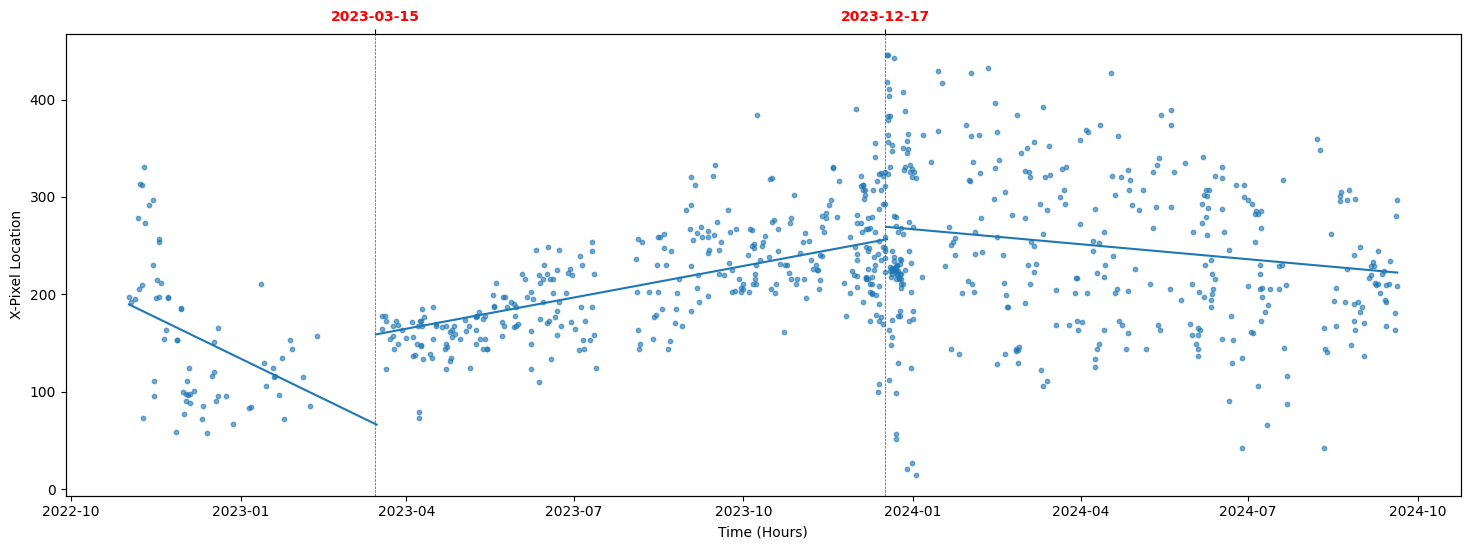

In [38]:
sltrend.plot_segmented_domain_model(report=True)

Segmentation dates (in matplotlib date format): [19431.0, 19708.0]
Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 214.0, 217.0, 220.0,
       223.0, 226.0, 229.0, 232.0],
      dtype='float64', name='Y')
Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 214.0, 217.0, 220.0,
       223.0, 226.0, 229.0, 232.0],
      dtype='float64', name='Y')
Index([163.0, 166.0, 169.0, 172.0, 175.0, 178.0, 181.0, 184.0, 187.0, 190.0,
       193.0, 196.0, 199.0, 202.0, 205.0, 208.0, 211.0, 214.0, 217.0, 220.0,
       223.0, 226.0, 229.0, 232.0],
      dtype='float64', name='Y')
Handles: [<matplotlib.lines.Line2D object at 0x000002310B384700>, <matplotlib.collections.PathCollection object at 0x000002310B7F0A90>, <matplotlib.lines.Line2D object at 0x000002310B7F0FA0>, <matplotlib.collections.PathCollection object at 0x000002310B7F0F40>, <m

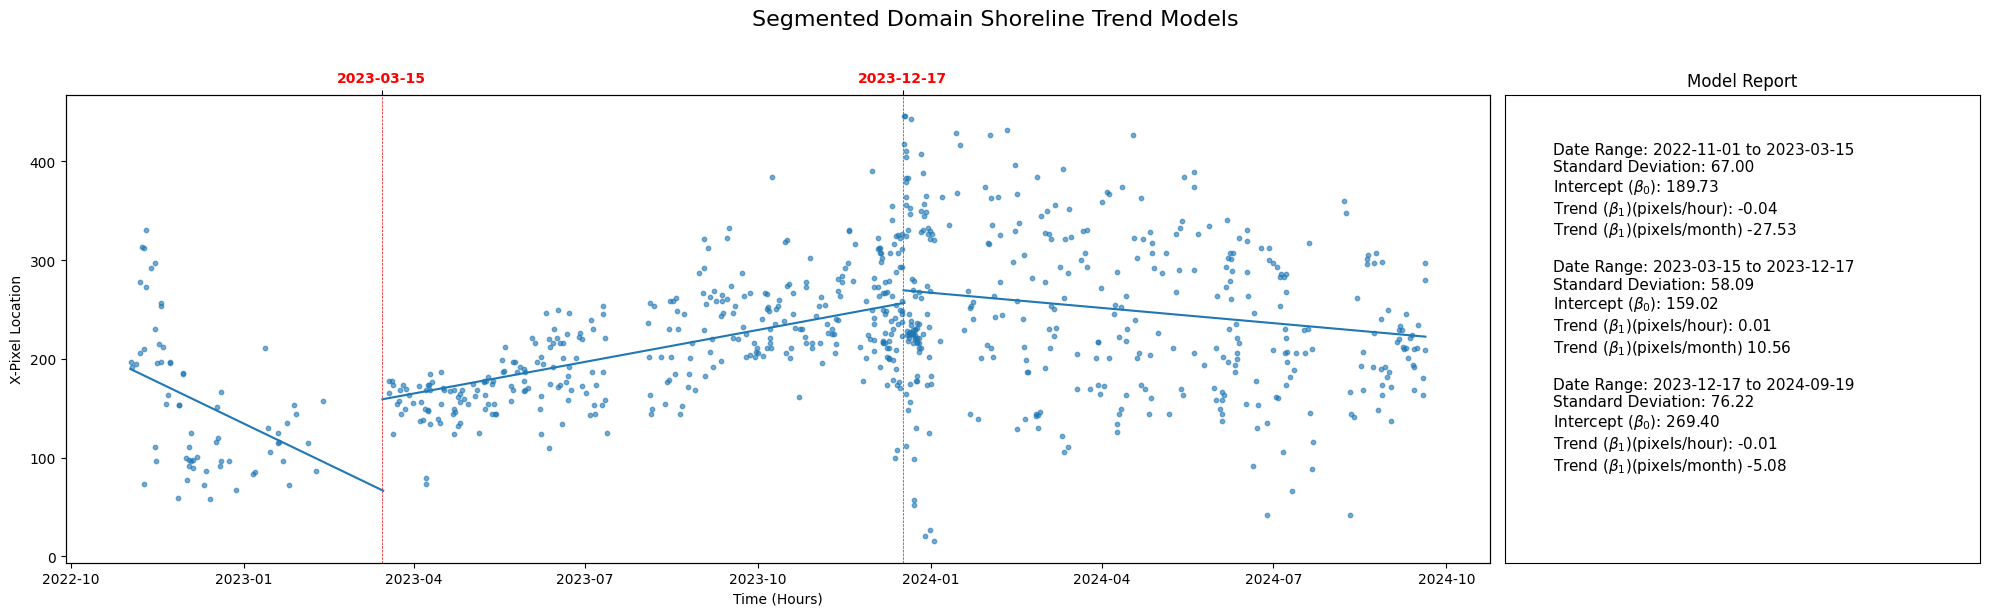

In [39]:
sltrend.plot_all_models()

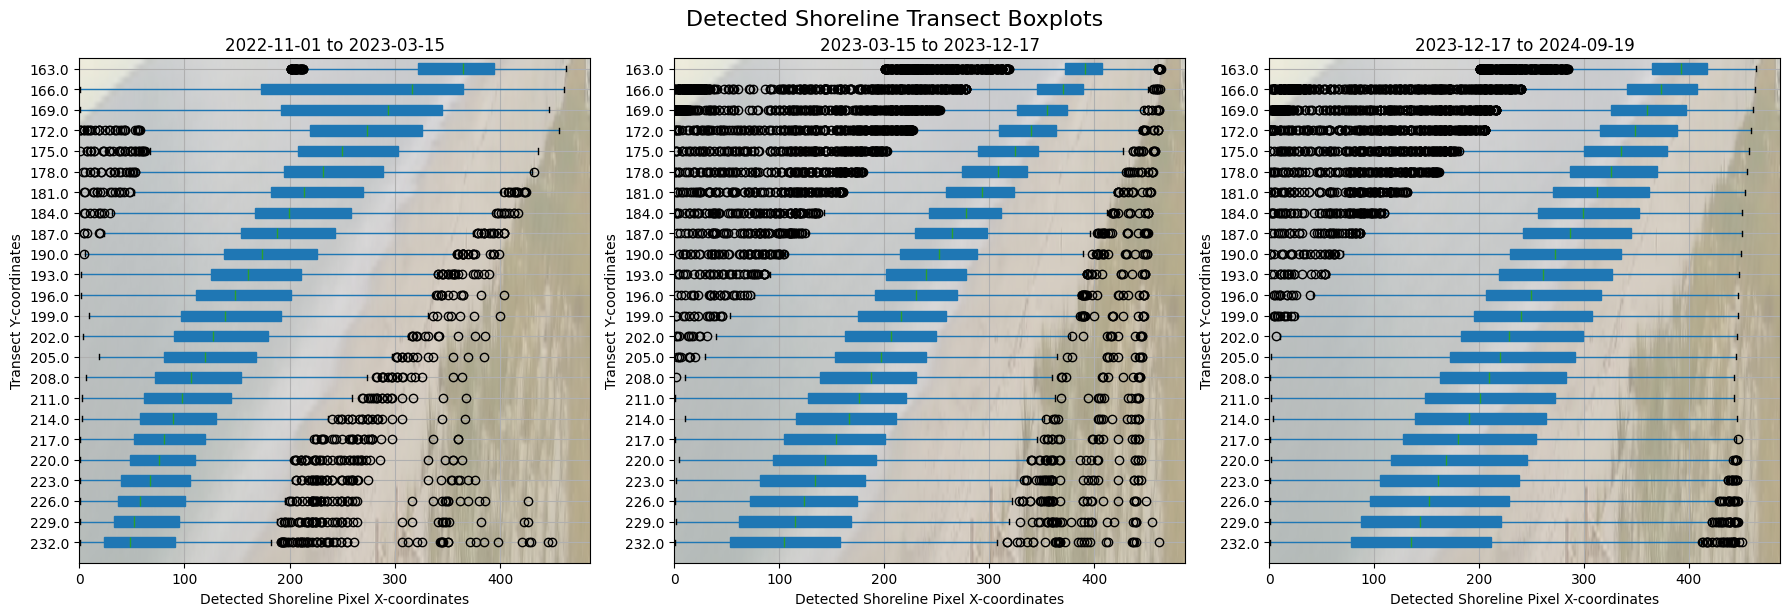

In [40]:
sltrend.segment_boxplots()

# Closer look at December 17th 2023

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Function to calculate polynomial coefficients
def calculate_polynomial_coefficients(df, transect, first_records_indices, degree=3):
    coeffs = []
    indices = []

    for i in range(len(first_records_indices)):
        if i == len(first_records_indices) - 1:
            daily_data = df.loc[first_records_indices[i]:]
        else:
            daily_data = df.loc[first_records_indices[i]:first_records_indices[i+1]-1]

        # Skip fitting if not enough data points
        if len(daily_data) <= degree:
            continue

        # Polynomial regression
        X = np.arange(len(daily_data))
        y = daily_data[transect].values
        p = Polynomial.fit(X, y, degree)
        
        # Extract polynomial coefficients
        coeff = p.convert().coef
        coeffs.append(coeff)
        indices.append(first_records_indices[i])
    
    return np.array(coeffs), indices

# Function to calculate linear trends
def calculate_trends(df, transect, first_records_indices):
    trends = pd.DataFrame(index=df.index, columns=[transect])
    
    for i in range(len(first_records_indices)):
        if i == len(first_records_indices) - 1:
            daily_data = df.loc[first_records_indices[i]:]
        else:
            daily_data = df.loc[first_records_indices[i]:first_records_indices[i+1]-1]

        # Simple linear regression
        X = np.arange(len(daily_data)).reshape(-1, 1)
        y = daily_data[transect].values
        model = LinearRegression()
        model.fit(X, y)
        
        # Predict trend line
        trend = model.predict(X)
        trends.loc[daily_data.index, transect] = trend
    
    return trends

# Function to calculate polynomial trends
def calculate_polynomial_trends(df, transect, first_records_indices, degree=3):
    poly_trends = pd.DataFrame(index=df.index, columns=[transect])
    
    for i in range(len(first_records_indices)):
        if i == len(first_records_indices) - 1:
            daily_data = df.loc[first_records_indices[i]:]
        else:
            daily_data = df.loc[first_records_indices[i]:first_records_indices[i+1]-1]

        # Skip fitting if not enough data points
        if len(daily_data) <= degree:
            continue

        # Polynomial regression
        X = np.arange(len(daily_data))
        y = daily_data[transect].values
        p = Polynomial.fit(X, y, degree)
        
        # Predict polynomial trend line
        trend = p(X)
        poly_trends.loc[daily_data.index, transect] = trend
    
    return poly_trends

In [42]:

# subset to 2023-12-17
# Get the shoreline coordinates DataFrame
shoreline_coords_df = processor.get_shoreline_coords()
sld17 = shoreline_coords_df.loc['2023-12-17':'2023-12-17'].copy()
sld17['Time Info'] = sld17.index
sld17.reset_index(drop=True, inplace=True)
# sld17['date'] = sld17['Time Info'].apply(lambda x: x.date())
sld17['hour'] = sld17['Time Info'].apply(lambda x: x.hour)
sld17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   163.0      18 non-null     float64       
 1   166.0      25 non-null     float64       
 2   169.0      58 non-null     float64       
 3   172.0      60 non-null     float64       
 4   175.0      60 non-null     float64       
 5   178.0      60 non-null     float64       
 6   181.0      60 non-null     float64       
 7   184.0      60 non-null     float64       
 8   187.0      60 non-null     float64       
 9   190.0      60 non-null     float64       
 10  193.0      60 non-null     float64       
 11  196.0      60 non-null     float64       
 12  199.0      60 non-null     float64       
 13  202.0      60 non-null     float64       
 14  205.0      60 non-null     float64       
 15  208.0      60 non-null     float64       
 16  211.0      60 non-null     float64       
 17 

C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\1444323704.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sld17['cluster'].fillna(method='ffill', inplace=True)
C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\1444323704.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sld17['cluster'].fillna(method='ffill', inplace=True)


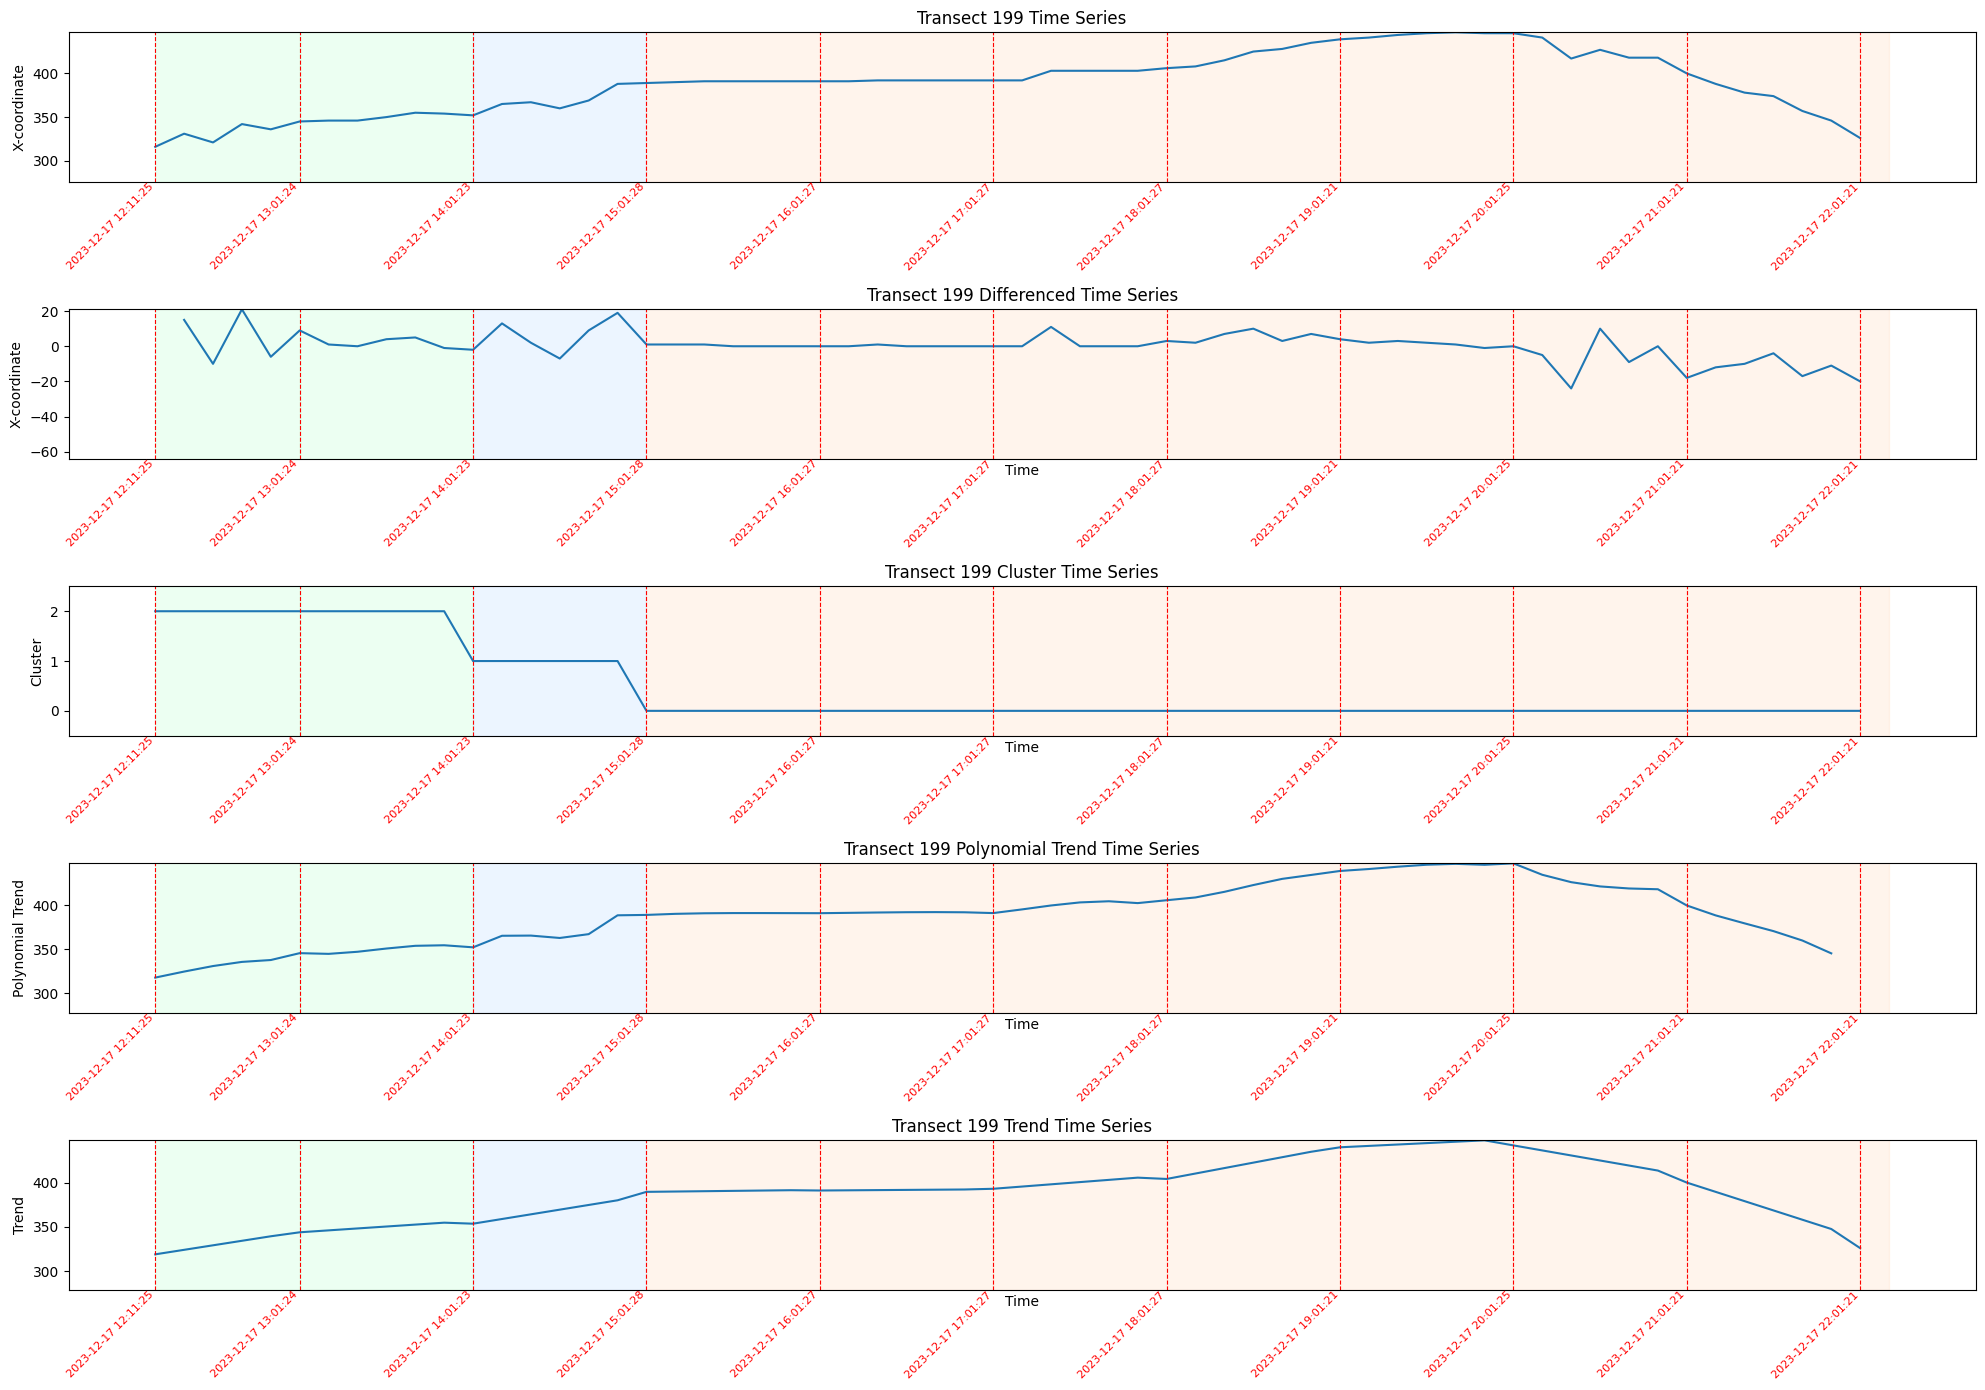

In [43]:
# first_records_indices = sld17.groupby('date').head(1).index
first_records_indices = sld17.groupby('hour').head(1).index
transect = 199
# Calculate trends
trends = calculate_trends(sld17, transect, first_records_indices)

# Calculate polynomial trends
poly_trends = calculate_polynomial_trends(sld17, transect, first_records_indices)

# Calculate polynomial coefficients
coeffs, indices = calculate_polynomial_coefficients(sld17, transect, first_records_indices)

# Normalize the coefficients
scaler = StandardScaler()
coeffs_normalized = scaler.fit_transform(coeffs)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coeffs_normalized)

# Add clusters to DataFrame
sld17['cluster'] = np.nan
for i, idx in enumerate(indices):
    sld17.at[idx, 'cluster'] = clusters[i]
sld17['cluster'].fillna(method='ffill', inplace=True)

# Define the colors for clusters
cluster_colors = ['#FFDDC1', '#C1E1FF', '#C1FFD7']  # Light pastel colors

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(20, 14), sharex=True)

# Plot the original time series
axs[0].plot(sld17.index, sld17[transect], label=f'Transect {transect} Time Series')
axs[0].set_title(f'Transect {transect} Time Series')
axs[0].set_ylabel('X-coordinate')

# Add background colors based on clusters
for idx in first_records_indices:
    cluster = int(sld17.loc[idx, 'cluster'])
    if idx == first_records_indices[-1]:
        end_idx = len(sld17)
    else:
        end_idx = first_records_indices[first_records_indices.get_loc(idx) + 1]
    axs[0].add_patch(patches.Rectangle((idx, sld17[transect].min() - 40), end_idx-idx, sld17[transect].max() - sld17[transect].min() + 80, color=cluster_colors[cluster], alpha=0.3))

# Add vertical lines and date labels to the original time series plot
for idx in first_records_indices:
    date_label = sld17.at[idx, 'Time Info']
    axs[0].axvline(x=idx, color='r', linestyle='--', linewidth=0.8)
    axs[0].text(idx, sld17[transect].min() - 40, date_label, rotation=45, ha='right', va='top', fontsize=8, color='r')

axs[0].set_ylim(sld17[transect].min() - 40, sld17[transect].max())
axs[0].set_xticks([])

# Plot the differenced time series
axs[1].plot(sld17.index, sld17[transect].diff(), label=f'Transect {transect} Differenced Time Series')
axs[1].set_title(f'Transect {transect} Differenced Time Series')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('X-coordinate')

# Add background colors based on clusters
for idx in first_records_indices:
    cluster = int(sld17.loc[idx, 'cluster'])
    if idx == first_records_indices[-1]:
        end_idx = len(sld17)
    else:
        end_idx = first_records_indices[first_records_indices.get_loc(idx) + 1]
    axs[1].add_patch(patches.Rectangle((idx, sld17[transect].diff().min() - 40), end_idx-idx, sld17[transect].diff().max() - sld17[transect].diff().min() + 80, color=cluster_colors[cluster], alpha=0.3))

# Add vertical lines and date labels to the differenced time series plot
for idx in first_records_indices:
    date_label = sld17.at[idx, 'Time Info']
    axs[1].axvline(x=idx, color='r', linestyle='--', linewidth=0.8)
    axs[1].text(idx, sld17[transect].diff().min() - 40, date_label, rotation=45, ha='right', va='top', fontsize=8, color='r')

axs[1].set_ylim(sld17[transect].diff().min() - 40, sld17[transect].diff().max())

# Plot the cluster time series
axs[2].plot(sld17.index, sld17['cluster'], label=f'Transect {transect} Cluster Time Series')
axs[2].set_title(f'Transect {transect} Cluster Time Series')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Cluster')

# Add background colors based on clusters
for idx in first_records_indices:
    cluster = int(sld17.loc[idx, 'cluster'])
    if idx == first_records_indices[-1]:
        end_idx = len(sld17)
    else:
        end_idx = first_records_indices[first_records_indices.get_loc(idx) + 1]
    axs[2].add_patch(patches.Rectangle((idx, sld17['cluster'].min() - 0.5), end_idx-idx, sld17['cluster'].max() - sld17['cluster'].min() + 1, color=cluster_colors[cluster], alpha=0.3))

# Add vertical lines and date labels to the cluster time series plot
for idx in first_records_indices:
    date_label = sld17.at[idx, 'Time Info']
    axs[2].axvline(x=idx, color='r', linestyle='--', linewidth=0.8)
    axs[2].text(idx, sld17['cluster'].min() - 0.5, date_label, rotation=45, ha='right', va='top', fontsize=8, color='r')

axs[2].set_ylim(sld17['cluster'].min() - 0.5, sld17['cluster'].max() + 0.5)

# Plot the polynomial trend time series
axs[3].plot(poly_trends.index, poly_trends[transect], label=f'Transect {transect} Polynomial Trend Time Series')
axs[3].set_title(f'Transect {transect} Polynomial Trend Time Series')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Polynomial Trend')

# Add background colors based on clusters
for idx in first_records_indices:
    cluster = int(sld17.loc[idx, 'cluster'])
    if idx == first_records_indices[-1]:
        end_idx = len(sld17)
    else:
        end_idx = first_records_indices[first_records_indices.get_loc(idx) + 1]
    axs[3].add_patch(patches.Rectangle((idx, poly_trends[transect].min() - 40), end_idx-idx, poly_trends[transect].max() - poly_trends[transect].min() + 80, color=cluster_colors[cluster], alpha=0.3))

# Add vertical lines and date labels to the polynomial trend time series plot
for idx in first_records_indices:
    date_label = sld17.at[idx, 'Time Info']
    axs[3].axvline(x=idx, color='r', linestyle='--', linewidth=0.8)
    axs[3].text(idx, poly_trends[transect].min() - 40, date_label, rotation=45, ha='right', va='top', fontsize=8, color='r')

axs[3].set_ylim(poly_trends[transect].min() - 40, poly_trends[transect].max())

# Plot the trend time series
axs[4].plot(trends.index, trends[transect], label=f'Transect {transect} Trend Time Series')
axs[4].set_title(f'Transect {transect} Trend Time Series')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Trend')

# Add background colors based on clusters
for idx in first_records_indices:
    cluster = int(sld17.loc[idx, 'cluster'])
    if idx == first_records_indices[-1]:
        end_idx = len(sld17)
    else:
        end_idx = first_records_indices[first_records_indices.get_loc(idx) + 1]
    axs[4].add_patch(patches.Rectangle((idx, trends[transect].min() - 40), end_idx-idx, trends[transect].max() - trends[transect].min() + 80, color=cluster_colors[cluster], alpha=0.3))

# Add vertical lines and date labels to the trend time series plot
for idx in first_records_indices:
    date_label = sld17.at[idx, 'Time Info']
    axs[4].axvline(x=idx, color='r', linestyle='--', linewidth=0.8)
    axs[4].text(idx, trends[transect].min() - 40, date_label, rotation=45, ha='right', va='top', fontsize=8, color='r')

axs[4].set_ylim(trends[transect].min() - 40, trends[transect].max())
# fig.legend(handles=[patches.Patch(color=color, label=f'Cluster {i}') for i, color in enumerate(cluster_colors)], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [44]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,7800.0,-434.613183,322.373514,-1.100414e+03,-6.971121e+02,-4.939134e+02,-2.278301e+02,1290.222464
slope,7800.0,3.395574,1.521042,-5.126232e+00,2.573043e+00,3.740145e+00,4.594275e+00,6.877681
rmse,7800.0,15.648644,19.831651,1.160832e+00,4.857757e+00,8.859088e+00,1.595767e+01,170.930861
mae,7800.0,11.726023,14.108411,8.781522e-01,3.875972e+00,7.239722e+00,1.275169e+01,160.835616
r2,7800.0,0.878490,0.261317,1.492254e-07,9.551250e-01,9.891645e-01,9.951352e-01,0.999718
conf_int_low,7800.0,3.062391,1.728572,-6.778897e+00,2.322606e+00,3.543845e+00,4.359429e+00,5.935776
conf_int_high,7800.0,3.728757,1.412714,-3.473567e+00,2.849455e+00,3.971904e+00,4.851956e+00,8.855321
p_values,7800.0,0.023213,0.113219,1.510870e-40,6.088461e-27,4.086024e-23,2.553378e-16,0.998571
t_values,7800.0,48.176897,35.558606,-1.183155e+01,2.163915e+01,4.481477e+01,6.708396e+01,279.252230
std_errors,7800.0,0.160657,0.203602,1.191772e-02,4.987236e-02,9.095218e-02,1.638300e-01,1.754869


In [45]:

# subset to 2023-12-17
# Get the shoreline coordinates DataFrame
shoreline_coords_df = processor.get_shoreline_coords()
sld17 = shoreline_coords_df.loc['2023-12-17':'2023-12-17'].copy()
# sld17['Time Info'] = sld17.index
# sld17.reset_index(drop=True, inplace=True)
# sld17['date'] = sld17['Time Info'].apply(lambda x: x.date())
# sld17['hour'] = sld17['Time Info'].apply(lambda x: x.hour)
# drop only columns with NaN values
sld17.dropna(axis=1,inplace=True)
sld17.head()


Y,172.0,175.0,178.0,181.0,184.0,187.0,190.0,193.0,196.0,199.0,...,205.0,208.0,211.0,214.0,217.0,220.0,223.0,226.0,229.0,232.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-12-17 12:11:25,389.0,383.0,374.0,365.0,360.0,344.0,337.0,331.0,322.0,316.0,...,304.0,297.0,288.0,279.0,274.0,268.0,262.0,254.0,253.0,240.0
2023-12-17 12:21:24,397.0,392.0,377.0,374.0,370.0,365.0,360.0,342.0,336.0,331.0,...,321.0,312.0,302.0,302.0,293.0,285.0,279.0,264.0,253.0,245.0
2023-12-17 12:31:24,393.0,383.0,374.0,369.0,360.0,355.0,348.0,346.0,328.0,321.0,...,307.0,307.0,298.0,293.0,288.0,281.0,269.0,264.0,255.0,245.0
2023-12-17 12:41:24,422.0,417.0,393.0,384.0,376.0,370.0,367.0,360.0,355.0,342.0,...,340.0,336.0,331.0,312.0,304.0,300.0,293.0,286.0,285.0,278.0
2023-12-17 12:51:24,398.0,395.0,383.0,378.0,372.0,366.0,360.0,352.0,340.0,336.0,...,322.0,317.0,314.0,301.0,293.0,288.0,285.0,278.0,273.0,266.0


In [46]:
# Hourly average of the transects, grouped by the hour
sld17_hourly = sld17.groupby(sld17.index.hour).mean()
sld17_hourly.iloc[:,:]

#take the average value of the transects for each hour
sld17_hourly_avgx = sld17_hourly.mean(axis=1)
avg_duneline_xpos = sld17_hourly_avgx.loc[14:15].mean()

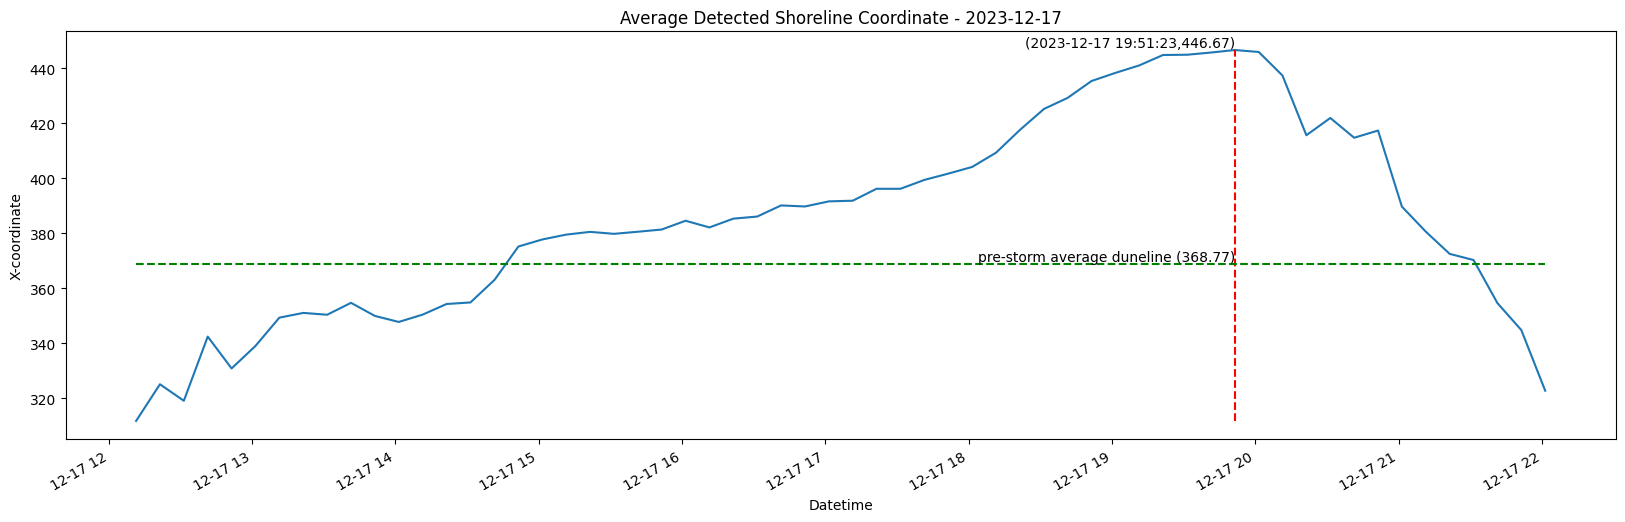

In [47]:

slx_time_avg = sld17.mean(axis=1)
# get index of the maximum value
max_index = slx_time_avg.idxmax()
slx_time_avg.plot().vlines(max_index, slx_time_avg.min(), slx_time_avg.max(), color='r', linestyle='--', label='Max Value')
# make pointer to the maximum value with the (max_index, slx_time_avg[max_index]) coordinates
# format value to 2 decimal points
plt.text(max_index, slx_time_avg[max_index], f'({max_index},{slx_time_avg[max_index]:.2f})', ha='right', va='bottom')

# add hline for avg_duneline_xpos
plt.hlines(avg_duneline_xpos, slx_time_avg.index.min(), slx_time_avg.index.max(), color='g', linestyle='--', label='Avg Duneline X-pos')

#add label for the avg_duneline_xpos as 'pre-storm average duneline x-pos'
plt.text(max_index, avg_duneline_xpos, f'pre-storm average duneline ({avg_duneline_xpos:.2f})', ha='right', va='bottom')
# add title
plt.title('Average Detected Shoreline Coordinate - 2023-12-17')
# add y-axis label
plt.ylabel('X-coordinate')
# Use full datetime format from the index

# extend figure width to 20
plt.gcf().set_size_inches(20, 6)

In [48]:
slx_time_avg



Datetime
2023-12-17 12:11:25    311.761905
2023-12-17 12:21:24    325.095238
2023-12-17 12:31:24    319.095238
2023-12-17 12:41:24    342.428571
2023-12-17 12:51:24    330.857143
2023-12-17 13:01:24    339.047619
2023-12-17 13:11:24    349.333333
2023-12-17 13:21:26    351.047619
2023-12-17 13:31:24    350.380952
2023-12-17 13:41:23    354.714286
2023-12-17 13:51:23    349.952381
2023-12-17 14:01:23    347.761905
2023-12-17 14:11:23    350.428571
2023-12-17 14:21:23    354.285714
2023-12-17 14:31:23    354.857143
2023-12-17 14:41:30    363.095238
2023-12-17 14:51:28    375.190476
2023-12-17 15:01:28    377.761905
2023-12-17 15:11:28    379.523810
2023-12-17 15:21:28    380.523810
2023-12-17 15:31:28    379.809524
2023-12-17 15:41:28    380.571429
2023-12-17 15:51:28    381.380952
2023-12-17 16:01:27    384.571429
2023-12-17 16:11:27    382.142857
2023-12-17 16:21:27    385.333333
2023-12-17 16:31:27    386.095238
2023-12-17 16:41:27    390.142857
2023-12-17 16:51:27    389.761905
2023-

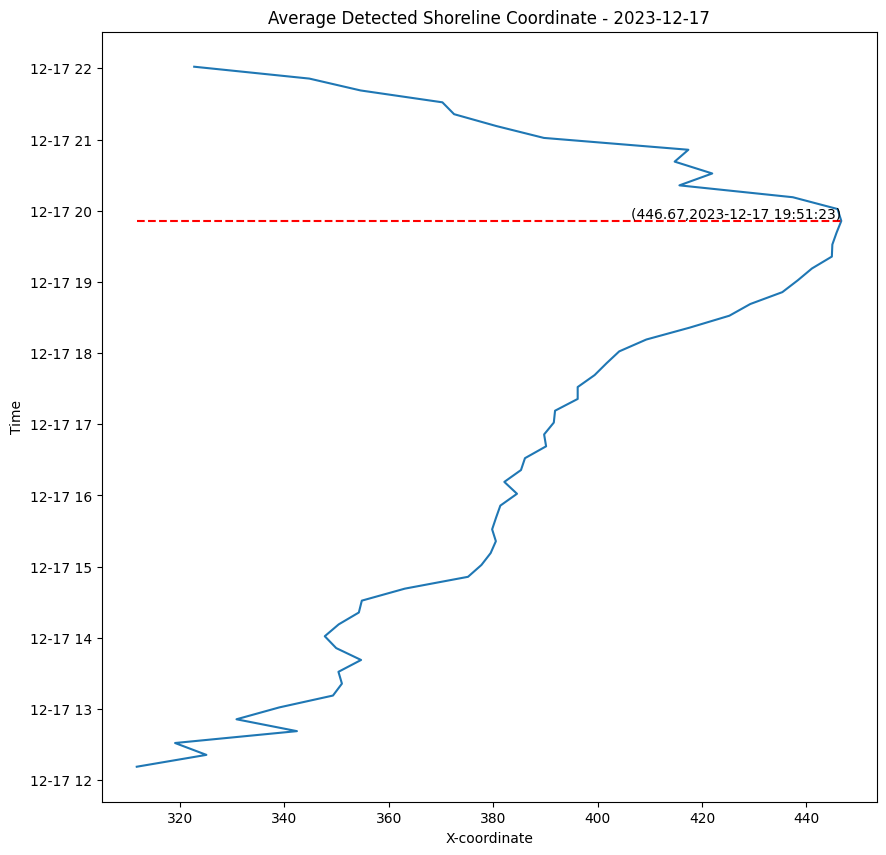

In [49]:
import matplotlib.pyplot as plt

# Calculate the average of the shoreline coordinates over time
slx_time_avg = sld17.mean(axis=1)

# Get the index of the maximum value
max_index = slx_time_avg.idxmax()

# Plot the average shoreline coordinate over time, flipping the axes
plt.plot(slx_time_avg.values, slx_time_avg.index)

# Add a horizontal line at the maximum value's index, now on the y-axis
plt.hlines(max_index, slx_time_avg.min(), slx_time_avg.max(), color='r', linestyle='--', label='Max Value')

# Annotate the maximum value with its coordinates, formatted to 2 decimal places
plt.text(slx_time_avg[max_index], max_index, f'({slx_time_avg[max_index]:.2f},{max_index})', 
         ha='right', va='bottom')

# Add title and x-axis label
plt.title('Average Detected Shoreline Coordinate - 2023-12-17')
plt.xlabel('X-coordinate')
plt.ylabel('Time')

# Extend figure width to 20 inches
plt.gcf().set_size_inches(10, 10)

# Display the plot
plt.show()



C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\333203673.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


Original image dimensions: (2048, 1536)
Resized image dimensions: (614, 460)


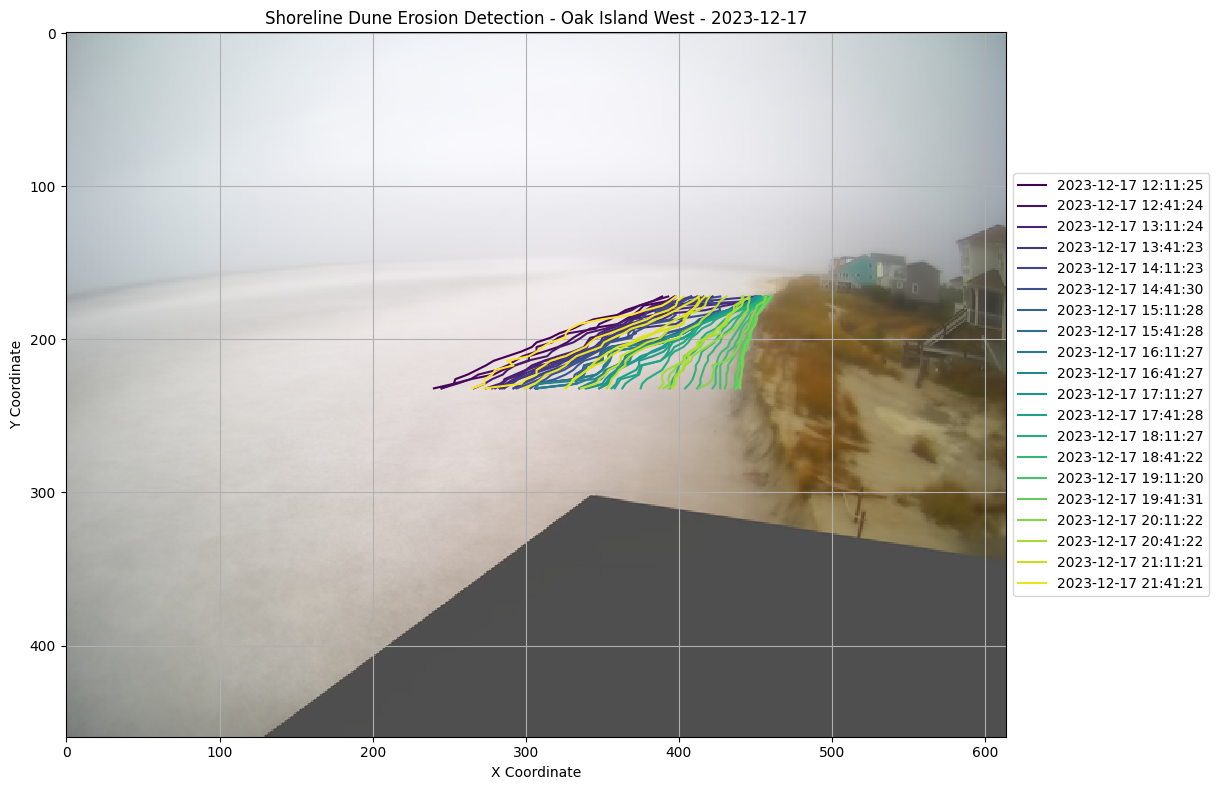

In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the image
# avg_image_path = './images/oakisland_west/timex/oakisland_west-2023-12-01-160842Z-timex.jpeg'
# avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-150128Z-timex.jpeg'

avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-200125Z-timex.jpeg'
image = Image.open(avg_image_path)

# Resize the image to 30% of its original dimensions
new_size = (int(image.width * 0.3), int(image.height * 0.3))
resized_image = image.resize(new_size, Image.ANTIALIAS)

# Convert the resized image to a NumPy array
resized_image_array = np.array(resized_image)

# Print the dimensions of the original and resized images
print(f"Original image dimensions: {image.size}")
print(f"Resized image dimensions: {resized_image.size}")

# Display the resized image
fig, ax = plt.subplots(figsize=(20, 8))
ax.imshow(resized_image_array, interpolation='nearest')

# Get the colormap
colors = cm.viridis(np.linspace(0, 1, len(sld17)))

# Plot the first 24 shoreline curves
for i in range(len(sld17)):  # Ensure we don't exceed available data
    # Extract x and y coordinates
    shoreline_points_x = sld17.iloc[i].values  # Values at index i
    shoreline_points_y = sld17.columns.astype(float)  # Column names (Y-coordinates)

    # Plot the shoreline curve
    ax.plot(shoreline_points_x, shoreline_points_y, color=colors[i], linestyle='-', label=sld17.index[i].strftime('%Y-%m-%d %H:%M:%S'))

ax.set_title('Shoreline Dune Erosion Detection - Oak Island West - 2023-12-17')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.grid(True)

# Place the legend outside the plot
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Get the handles and labels from the current plot
handles, labels = ax.get_legend_handles_labels()

# Select every 3rd handle and label
filtered_handles = handles[::3]
filtered_labels = labels[::3]

# Create the legend with the filtered handles and labels
ax.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()



C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\1998422304.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


Original image dimensions: (2048, 1536)
Resized image dimensions: (614, 460)


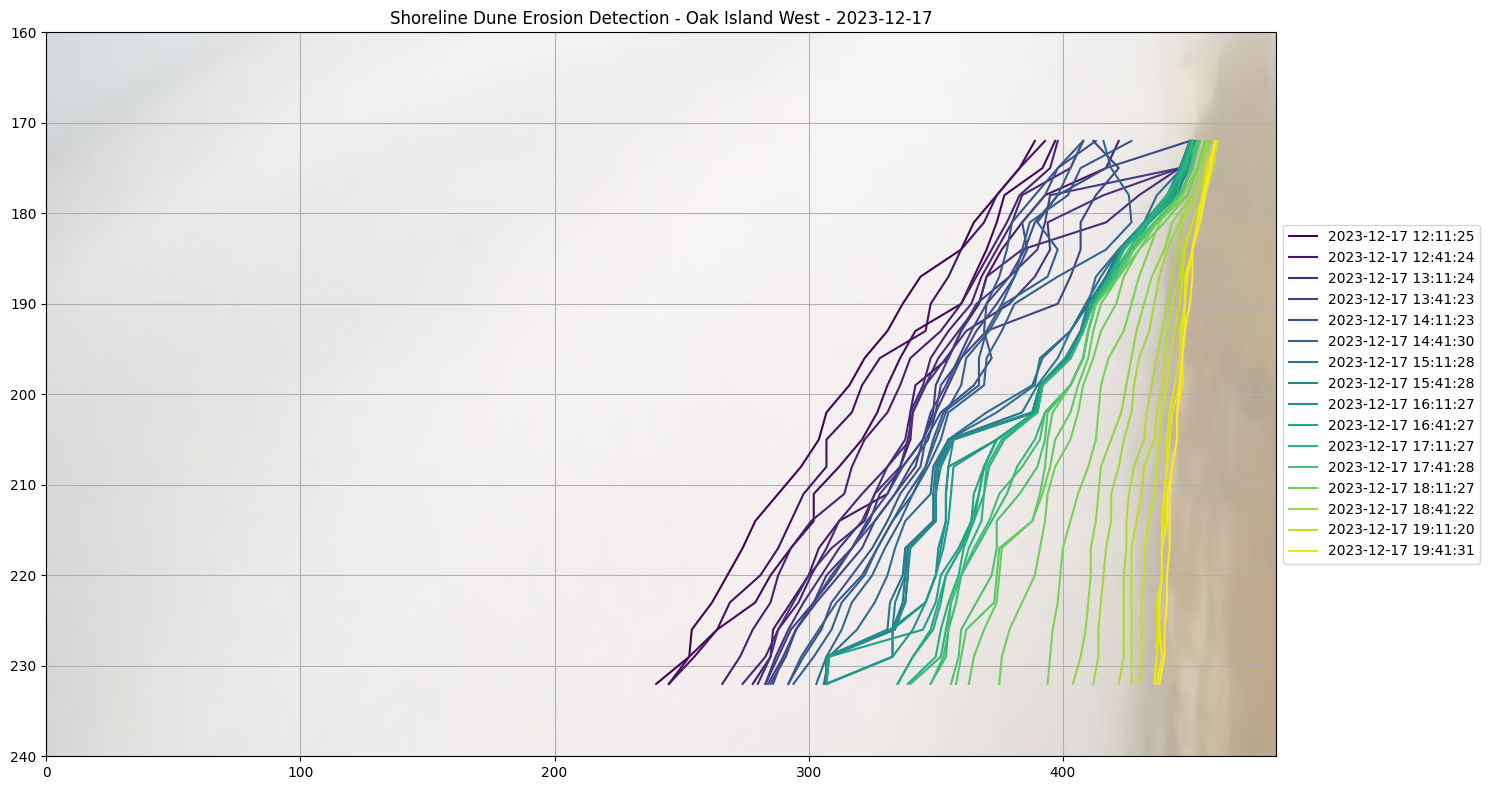

In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the image
# avg_image_path = './images/oakisland_west/timex/oakisland_west-2023-12-01-160842Z-timex.jpeg'
# avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-150128Z-timex.jpeg'
avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-200125Z-timex.jpeg'
image = Image.open(avg_image_path)

# Resize the image to 30% of its original dimensions
new_size = (int(image.width * 0.3), int(image.height * 0.3))
resized_image = image.resize(new_size, Image.ANTIALIAS)

# Convert the resized image to a NumPy array
resized_image_array = np.array(resized_image)

# Print the dimensions of the original and resized images
print(f"Original image dimensions: {image.size}")
print(f"Resized image dimensions: {resized_image.size}")

# Display the resized image
fig, ax = plt.subplots(figsize=(20, 8))

# Subset the image to focus on a specific area (e.g., y=160 to y=240 and x=0 to x=495)
subset_image_array = resized_image_array[160:240, 0:495, :]

# Overlay the subset image on the plot
ax.imshow(subset_image_array, aspect='auto', extent=[0, 1, 0, 1], alpha=0.5, zorder=-1,transform=ax.transAxes)


sld17 = sld17.loc[:'2023-12-17 19:51:23', :]

# Get the colormap
colors = cm.viridis(np.linspace(0, 1, len(sld17)))
# alternative colormaps: viridis, plasma, inferno, magma, cividis
# colors = cm.magma(np.linspace(0, 1, len(sld17)))


# Plot the shoreline curves scaled to the same axes
for i in range(len(sld17)):  # Ensure we don't exceed available data
    # Extract x and y coordinates
    shoreline_points_x = sld17.iloc[i].values  # Values at index i
    # print(shoreline_points_y)
    shoreline_points_y = sld17.columns.astype(float)  # Column names (Y-coordinates)

    # Scale the x-coordinates to the plot space
    ax.plot(shoreline_points_x, shoreline_points_y,
            color=colors[i], linestyle='-', label=sld17.index[i].strftime('%Y-%m-%d %H:%M:%S'))
    

ax.set_title('Shoreline Dune Erosion Detection - Oak Island West - 2023-12-17')
# ax.set_xlabel('X Coordinate')
# ax.set_ylabel('Y Coordinate')
# set y axis length to 160:240
ax.set_ylim(160, 240)
# ax.set_xlim(200, 495)
# set y axis to be inverted
ax.invert_yaxis()
ax.grid(True)

# Place the legend outside the plot if needed
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Get the handles and labels from the current plot
handles, labels = ax.get_legend_handles_labels()

# Select every 3rd handle and label
filtered_handles = handles[::3]
filtered_labels = labels[::3]

# Create the legend with the filtered handles and labels
ax.legend(filtered_handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))



plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()


In [52]:

# hourly average of the transects, grouped by the hour
sld17_hourly = sld17.groupby(sld17.index.hour).mean()
sld17_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 12 to 19
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   172.0   8 non-null      float64
 1   175.0   8 non-null      float64
 2   178.0   8 non-null      float64
 3   181.0   8 non-null      float64
 4   184.0   8 non-null      float64
 5   187.0   8 non-null      float64
 6   190.0   8 non-null      float64
 7   193.0   8 non-null      float64
 8   196.0   8 non-null      float64
 9   199.0   8 non-null      float64
 10  202.0   8 non-null      float64
 11  205.0   8 non-null      float64
 12  208.0   8 non-null      float64
 13  211.0   8 non-null      float64
 14  214.0   8 non-null      float64
 15  217.0   8 non-null      float64
 16  220.0   8 non-null      float64
 17  223.0   8 non-null      float64
 18  226.0   8 non-null      float64
 19  229.0   8 non-null      float64
 20  232.0   8 non-null      float64
dtypes: float64(21)
memory usage: 1.3 KB


Original image dimensions: (2048, 1536)
Resized image dimensions: (614, 460)


C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\3514024327.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


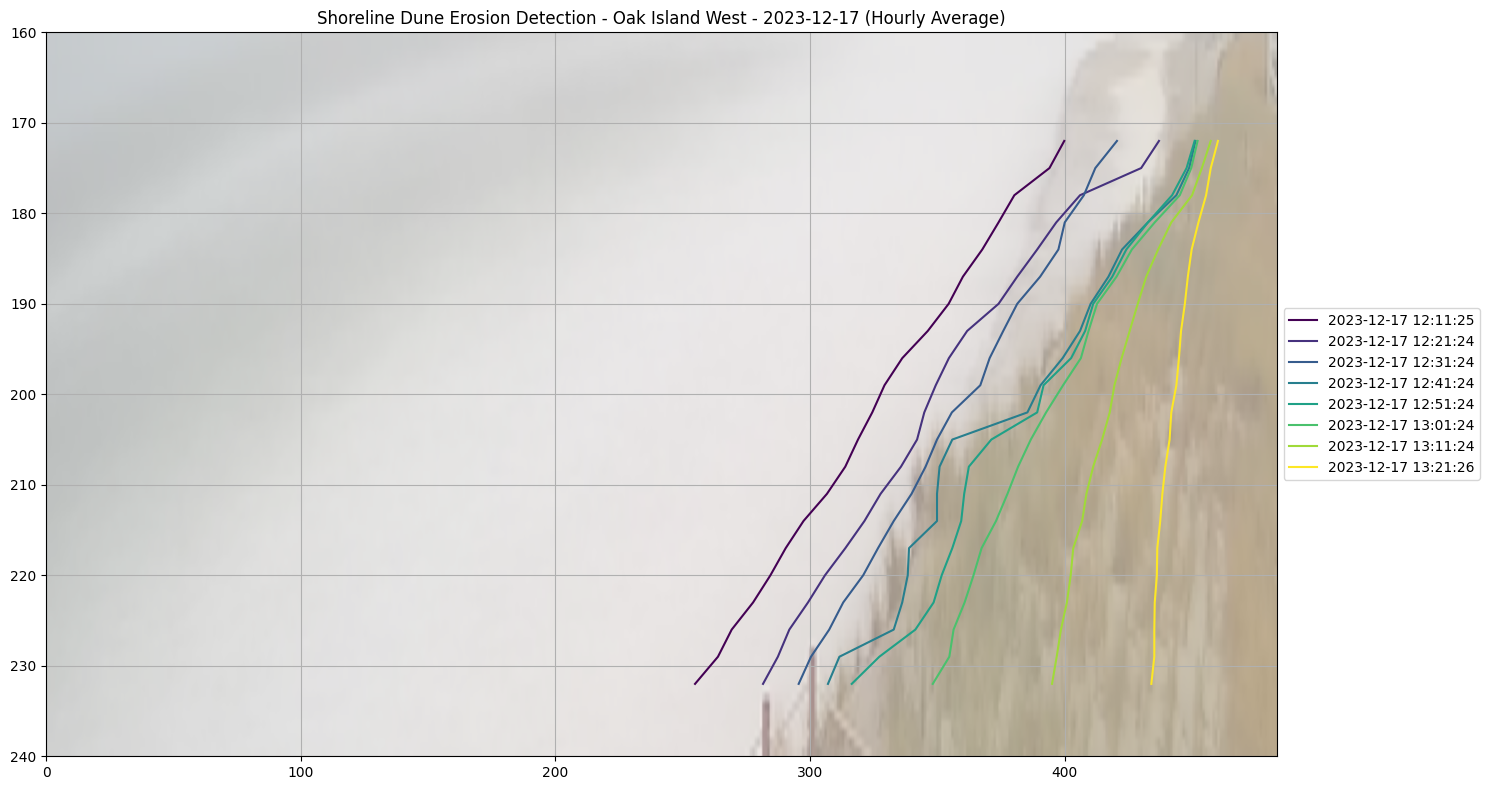

In [53]:

# Load the image
# avg_image_path = './images/oakisland_west/timex/oakisland_west-2023-12-01-160842Z-timex.jpeg'
avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-150128Z-timex.jpeg'

image = Image.open(avg_image_path)

# Resize the image to 30% of its original dimensions
new_size = (int(image.width * 0.3), int(image.height * 0.3))
resized_image = image.resize(new_size, Image.ANTIALIAS)

# Convert the resized image to a NumPy array
resized_image_array = np.array(resized_image)

# Print the dimensions of the original and resized images
print(f"Original image dimensions: {image.size}")
print(f"Resized image dimensions: {resized_image.size}")

# Display the resized image
fig, ax = plt.subplots(figsize=(20, 8))

# Subset the image to focus on a specific area (e.g., y=160 to y=240 and x=0 to x=495)
subset_image_array = resized_image_array[160:240, 0:495, :]

# Overlay the subset image on the plot
ax.imshow(subset_image_array, aspect='auto', extent=[0, 1, 0, 1], alpha=0.5, zorder=-1,transform=ax.transAxes)


sld17_hourly = sld17_hourly.loc[:'2023-12-17 21:00:00', :]

# Get the colormap
colors = cm.viridis(np.linspace(0, 1, len(sld17_hourly)))
# alternative colormaps: viridis, plasma, inferno, magma, cividis
# colors = cm.magma(np.linspace(0, 1, len(sld17)))


# Plot the shoreline curves scaled to the same axes
for i in range(len(sld17_hourly)):  # Ensure we don't exceed available data
    # Extract x and y coordinates
    shoreline_points_x = sld17_hourly.iloc[i].values  # Values at index i
    # print(shoreline_points_y)
    shoreline_points_y = sld17_hourly.columns.astype(float)  # Column names (Y-coordinates)

    # Scale the x-coordinates to the plot space
    ax.plot(shoreline_points_x, shoreline_points_y,
            color=colors[i], linestyle='-', label=sld17.index[i].strftime('%Y-%m-%d %H:%M:%S'))
    

ax.set_title('Shoreline Dune Erosion Detection - Oak Island West - 2023-12-17 (Hourly Average)')
# ax.set_xlabel('X Coordinate')
# ax.set_ylabel('Y Coordinate')
# set y axis length to 160:240
ax.set_ylim(160, 240)
# ax.set_xlim(200, 495)
# set y axis to be inverted
ax.invert_yaxis()
ax.grid(True)

# Place the legend outside the plot if needed
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_34140\1952875537.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


Original image dimensions: (2048, 1536)
Resized image dimensions: (614, 460)


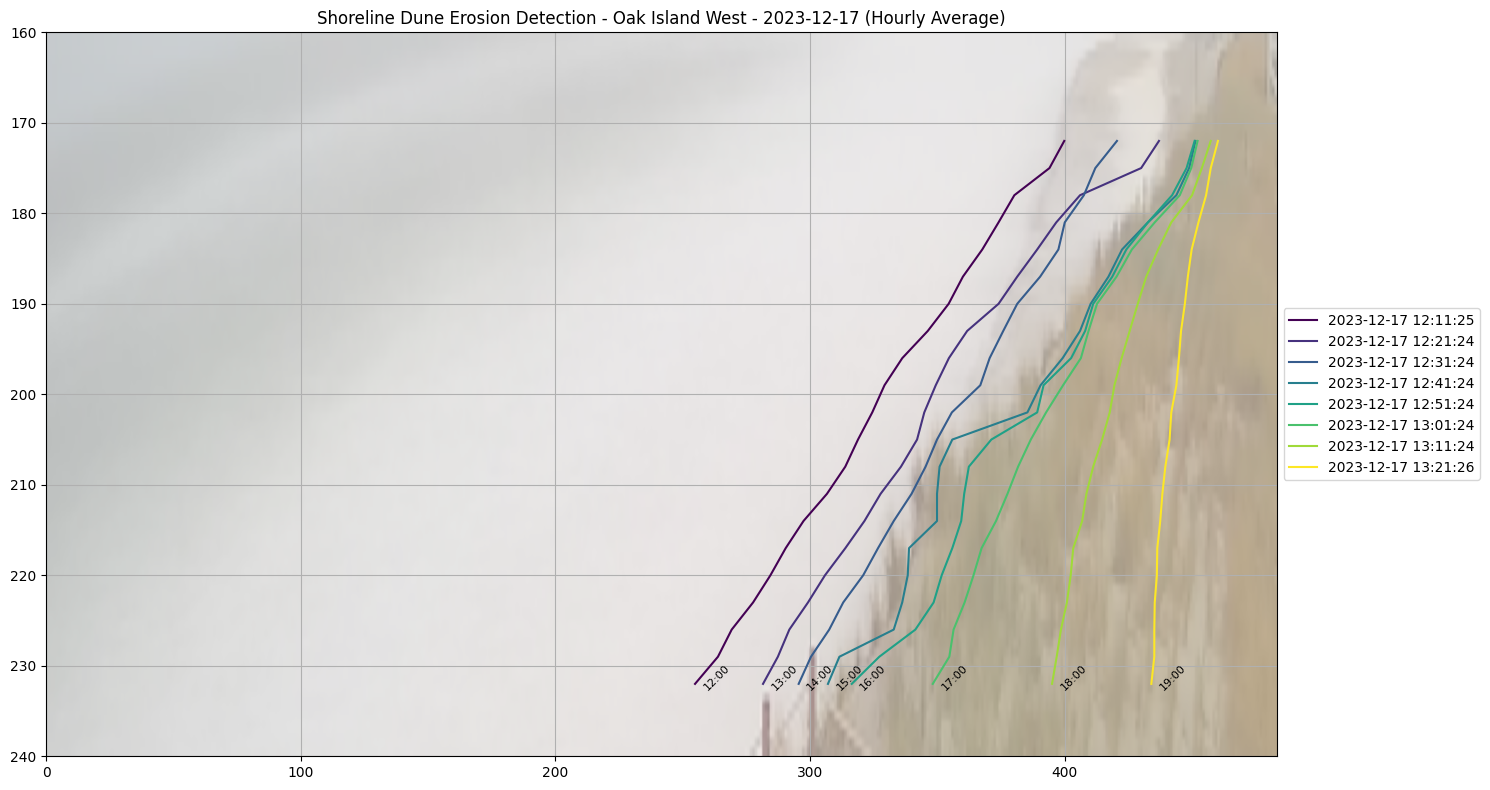

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from PIL import Image

# Hourly average of the transects, grouped by the hour
sld17_hourly = sld17.groupby(sld17.index.hour).mean()

# Load the image
# avg_image_path = './images/oakisland_west/timex/oakisland_west-2023-12-01-160842Z-timex.jpeg'
avg_image_path = '../images/oakisland_west/timex/oakisland_west-2023-12-17-150128Z-timex.jpeg'

image = Image.open(avg_image_path)

# Resize the image to 30% of its original dimensions
new_size = (int(image.width * 0.3), int(image.height * 0.3))
resized_image = image.resize(new_size, Image.ANTIALIAS)

# Convert the resized image to a NumPy array
resized_image_array = np.array(resized_image)

# Print the dimensions of the original and resized images
print(f"Original image dimensions: {image.size}")
print(f"Resized image dimensions: {resized_image.size}")

# Display the resized image
fig, ax = plt.subplots(figsize=(20, 8))

# Subset the image to focus on a specific area (e.g., y=160 to y=240 and x=0 to x=495)
subset_image_array = resized_image_array[160:240, 0:495, :]

# Overlay the subset image on the plot
ax.imshow(subset_image_array, aspect='auto', extent=[0, 1, 0, 1], alpha=0.5, zorder=-1, transform=ax.transAxes)

sld17_hourly = sld17_hourly.loc[:'2023-12-17 21:00:00', :]

# Get the colormap
colors = cm.viridis(np.linspace(0, 1, len(sld17_hourly)))
# colors = cm.magma(np.linspace(0, 1, len(sld17_hourly)))

# Plot the shoreline curves scaled to the same axes
for i in range(len(sld17_hourly)):  # Ensure we don't exceed available data
    # Extract x and y coordinates
    shoreline_points_x = sld17_hourly.iloc[i].values  # Values at index i
    shoreline_points_y = sld17_hourly.columns.astype(float)  # Column names (Y-coordinates)

    # Scale the x-coordinates to the plot space
    ax.plot(shoreline_points_x, shoreline_points_y, color=colors[i], linestyle='-', label=sld17.index[i].strftime('%Y-%m-%d %H:%M:%S'))

    # Annotate the last point of each curve with the hour index
    ax.annotate(f'{sld17_hourly.index[i]}:00',
                xy=(shoreline_points_x[-1], shoreline_points_y[-1]),
                xytext=(5, -5),
                textcoords='offset points',
                # color=colors[i],
                # rotate the text
                rotation=45,
                fontsize=8)

ax.set_title('Shoreline Dune Erosion Detection - Oak Island West - 2023-12-17 (Hourly Average)')
ax.set_ylim(160, 240)
# ax.set_xlim(200, 495)
ax.invert_yaxis()
ax.grid(True)
# Place the legend outside the plot if needed
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()
